<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1">Imports</a></span></li><li><span><a href="#Create-passing-in-each-tuple-individually" data-toc-modified-id="Create-passing-in-each-tuple-individually-2">Create passing in each tuple individually</a></span></li><li><span><a href="#rp-numerics" data-toc-modified-id="rp-numerics-3">rp numerics</a></span><ul class="toc-item"><li><span><a href="#freq-and-q-arrays" data-toc-modified-id="freq-and-q-arrays-3.1">freq and q arrays</a></span></li><li><span><a href="#q-array-and-single-freq" data-toc-modified-id="q-array-and-single-freq-3.2">q array and single freq</a></span></li><li><span><a href="#freq-array-and-single-q" data-toc-modified-id="freq-array-and-single-q-3.3">freq array and single q</a></span></li></ul></li><li><span><a href="#rs-numerics" data-toc-modified-id="rs-numerics-4">rs numerics</a></span><ul class="toc-item"><li><span><a href="#freq-and-q-arrays" data-toc-modified-id="freq-and-q-arrays-4.1">freq and q arrays</a></span></li><li><span><a href="#q-array-and-single-freq" data-toc-modified-id="q-array-and-single-freq-4.2">q array and single freq</a></span></li><li><span><a href="#freq-array-and-single-q" data-toc-modified-id="freq-array-and-single-q-4.3">freq array and single q</a></span></li></ul></li><li><span><a href="#tp-numerics" data-toc-modified-id="tp-numerics-5">tp numerics</a></span><ul class="toc-item"><li><span><a href="#freq-and-q-arrays" data-toc-modified-id="freq-and-q-arrays-5.1">freq and q arrays</a></span></li><li><span><a href="#q-array-and-single-freq" data-toc-modified-id="q-array-and-single-freq-5.2">q array and single freq</a></span></li><li><span><a href="#freq-array-and-single-q" data-toc-modified-id="freq-array-and-single-q-5.3">freq array and single q</a></span></li></ul></li><li><span><a href="#ts-numerics" data-toc-modified-id="ts-numerics-6">ts numerics</a></span><ul class="toc-item"><li><span><a href="#freq-and-q-arrays" data-toc-modified-id="freq-and-q-arrays-6.1">freq and q arrays</a></span></li><li><span><a href="#q-array-and-single-freq" data-toc-modified-id="q-array-and-single-freq-6.2">q array and single freq</a></span></li><li><span><a href="#freq-array-and-single-q" data-toc-modified-id="freq-array-and-single-q-6.3">freq array and single q</a></span></li></ul></li><li><span><a href="#h-numerics" data-toc-modified-id="h-numerics-7">h numerics</a></span><ul class="toc-item"><li><span><a href="#freq-and-q-arrays" data-toc-modified-id="freq-and-q-arrays-7.1">freq and q arrays</a></span></li><li><span><a href="#q-array-and-single-freq" data-toc-modified-id="q-array-and-single-freq-7.2">q array and single freq</a></span></li><li><span><a href="#freq-array-and-single-q" data-toc-modified-id="freq-array-and-single-q-7.3">freq array and single q</a></span></li></ul></li><li><span><a href="#k-numerics" data-toc-modified-id="k-numerics-8">k numerics</a></span><ul class="toc-item"><li><span><a href="#freq-and-q-arrays" data-toc-modified-id="freq-and-q-arrays-8.1">freq and q arrays</a></span></li><li><span><a href="#q-array-and-single-freq" data-toc-modified-id="q-array-and-single-freq-8.2">q array and single freq</a></span></li><li><span><a href="#freq-array-and-single-q" data-toc-modified-id="freq-array-and-single-q-8.3">freq array and single q</a></span></li></ul></li></ul></div>

# Imports

In [1]:
import Materials as M

<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "Bi2Se3_epsilon.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "PMMA_epsilon.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "sio2_300nm_extracted_epsilon_cone_A=2a.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "TaS2_eps_230K.csv"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "TaS2_eps_30K.csv"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "Erik_BSTS_epsilon.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "VO2_Insulating.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "VO2_Metallic.pickle"...


In [2]:
# %matplotlib notebook
from Materials import *
from Materials.material_types import *
import MatrixBuilder,Calculator
from common.baseclasses import AWA
import sympy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import scipy.special as ss
from scipy.optimize import curve_fit
import mpmath as mp
from mpmath.ctx_fp import FPContext
from sys import stdout
sympy.init_printing(use_unicode=True)

# Create passing in each tuple individually

In [3]:
layer =(SiO2_300nm,40e-7)
isinstance(layer,(Surface,Layer,LayeredMedia)) or (hasattr(layer,'__len__') and len(layer)==2)

True

In [4]:
LM = LayeredMediaTM((BN_Caldwell,30e-7),(SiO2_300nm,60e-7))

In [5]:
freq = np.linspace(200,2000,500)
# q = 1/30e-7
q = np.linspace(1,1e6,400)

T = MatrixBuilder.TransferMatrix(LM,polarization='p')
C = Calculator.Calculator(T)
C.assemble_analytical_reflection_coefficient()
tm = C.get_numerical_reflection_coefficient(freq,q)

ValueError: operands could not be broadcast together with shapes (500,) (400,) 

# rp numerics

## freq and q arrays

In [ ]:
freq = np.linspace(200,2000,500)
# q = 1/30e-7
q = np.linspace(1,1e6,400)

rp = LM.reflection_p(freq,q)
abs(rp).plot(vmax=1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [ ]:
abs(rp).cslice[1e5].plot()

## q array and single freq

In [ ]:
q = np.linspace(1,1e6,400)
freq = 1400
rp = LM.reflection_p(freq,q)
abs(rp).plot()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## freq array and single q

In [ ]:
freq = np.linspace(200,2000,500)
q = 1/30e-7
rp = LM.reflection_p(freq,q)
abs(rp).plot()

# rs numerics

## freq and q arrays

In [ ]:
freq = np.linspace(200,2000,500)
# q = 1/30e-7
q = np.linspace(1,1e6,400)

rs = LM.reflection_s(freq,q)
abs(rs).plot(vmax=1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [ ]:
abs(rs).cslice[1e5].plot()

## q array and single freq

In [ ]:
q = np.linspace(1,1e6,400)
freq = 1400
rs = LM.reflection_s(freq,q)
abs(rs).plot()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## freq array and single q

In [ ]:
freq = np.linspace(200,2000,500)
q = 1/30e-7
rs = LM.reflection_s(freq,q)
abs(rs).plot()

# tp numerics

## freq and q arrays

In [ ]:
freq = np.linspace(200,2000,500)
# q = 1/30e-7
q = np.linspace(1,1e6,400)

tp = LM.transmission_p(freq,q)
abs(tp).plot(vmax=1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [ ]:
abs(tp).cslice[1e5].plot()

## q array and single freq

In [ ]:
q = np.linspace(1,1e6,400)
freq = 1400
tp = LM.transmission_p(freq,q)
abs(tp).plot()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## freq array and single q

In [ ]:
freq = np.linspace(200,2000,500)
q = 1/30e-7
tp = LM.transmission_p(freq,q)
abs(tp).plot()

# ts numerics

## freq and q arrays

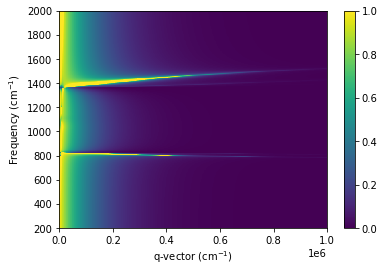

In [6]:
freq = np.linspace(200,2000,500)
# q = 1/30e-7
q = np.linspace(1,1e6,400)

ts = LM.transmission_s(freq,q)
abs(ts).plot(vmax=1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

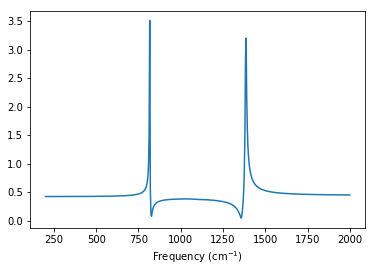

In [7]:
abs(ts).cslice[1e5].plot()

## q array and single freq

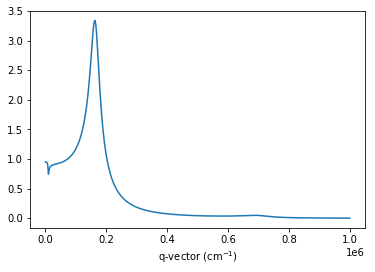

In [8]:
q = np.linspace(1,1e6,400)
freq = 1400
ts = LM.transmission_s(freq,q)
abs(ts).plot()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## freq array and single q

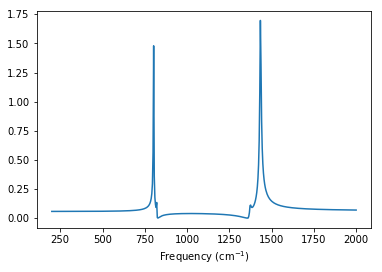

In [9]:
freq = np.linspace(200,2000,500)
q = 1/30e-7
ts = LM.transmission_s(freq,q)
abs(ts).plot()

# h numerics

## freq and q arrays

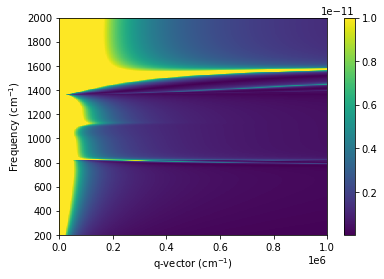

In [10]:
freq = np.linspace(200,2000,500)
# q = 1/30e-7
q = np.linspace(1,1e6,400)

h = LM.h_field(freq,q,index=1)
abs(h).plot(vmax=1e-11)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

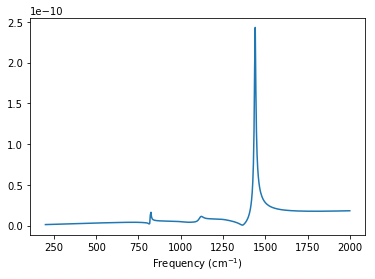

In [11]:
abs(h).cslice[1e5].plot()

## q array and single freq

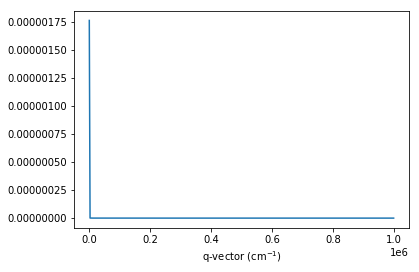

In [12]:
q = np.linspace(1,1e6,400)
freq = 1400
h = LM.h_field(freq,q)
abs(h).plot()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## freq array and single q

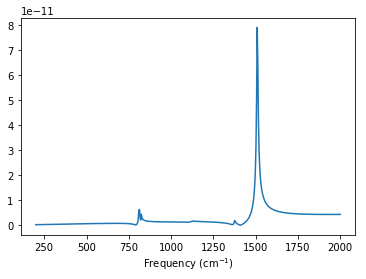

In [13]:
freq = np.linspace(200,2000,500)
q = 1/30e-7
h = LM.h_field(freq,q)
abs(h).plot()

# k numerics

## freq and q arrays

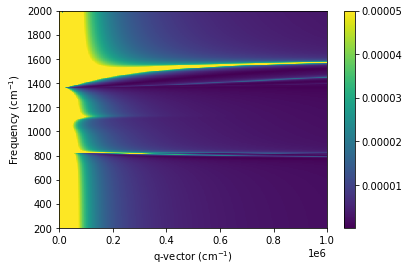

In [14]:
freq = np.linspace(200,2000,500)
# q = 1/30e-7
q = np.linspace(1,1e6,400)

k = LM.Coulomb_kernel(freq,q,index=1)
abs(k).plot(vmax=5e-5)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

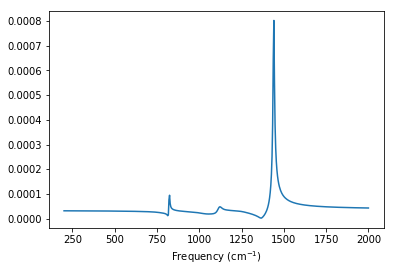

In [15]:
abs(k).cslice[1e5].plot()

## q array and single freq

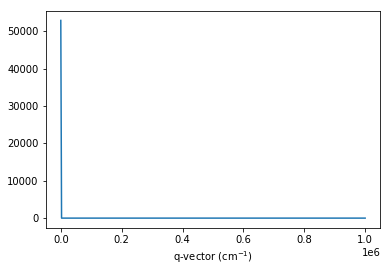

In [16]:
q = np.linspace(1,1e6,400)
freq = 1400
k = LM.Coulomb_kernel(freq,q)
abs(k).plot()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## freq array and single q

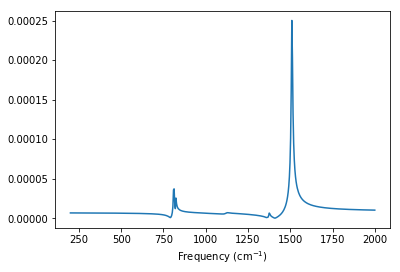

In [17]:
freq = np.linspace(200,2000,500)
q = 1/30e-7
k = LM.Coulomb_kernel(freq,q)
abs(k).plot()